In [ ]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.5 MB/s eta 0:00:

In [ ]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer, BertConfig, TrainingArguments,Trainer,BertModel
from datasets import load_dataset, load_metric
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
from datasets import load_dataset, load_metric

In [ ]:
from transformers import BertConfig, BertModel

# Load the existing configuration file for BERT base uncased
config = BertConfig.from_pretrained('bert-base-uncased')

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1 - Avg Train Loss: 0.5148
Epoch 1 - Accuracy: 72.89%
Avg Eval Loss: 0.4378
Accuracy: 81.08%

Epoch 2 - Avg Train Loss: 0.2795
Epoch 2 - Accuracy: 88.53%
Avg Eval Loss: 0.4365
Accuracy: 81.08%

Epoch 3 - Avg Train Loss: 0.2213
Epoch 3 - Accuracy: 91.31%
Avg Eval Loss: 0.4878
Accuracy: 80.05%

Epoch 4 - Avg Train Loss: 0.1884
Epoch 4 - Accuracy: 92.76%
Avg Eval Loss: 0.4765
Accuracy: 81.19%

Epoch 5 - Avg Train Loss: 0.1630
Epoch 5 - Accuracy: 93.77%
Avg Eval Loss: 0.5550
Accuracy: 80.62%

Epoch 6 - Avg Train Loss: 0.1377
Epoch 6 - Accuracy: 94.65%
Avg Eval Loss: 0.6197
Accuracy: 80.16%

Epoch 7 - Avg Train Loss: 0.1145
Epoch 7 - Accuracy: 95.50%
Avg Eval Loss: 0.7116
Accuracy: 79.13%

Epoch 8 - Avg Train Loss: 0.0903
Epoch 8 - Accuracy: 96.44%
Avg Eval Loss: 0.7385
Accuracy: 78.44%

Epoch 9 - Avg Train Loss: 0.0708
Epoch 9 - Accuracy: 97.18%
Avg Eval Loss: 0.8282
Accuracy: 78.56%

Epoch 10 - Avg Train Loss: 0.0542
Epoch 10 - Accuracy: 97.93%
Avg Eval Loss: 0.9294
Accuracy: 78.90%

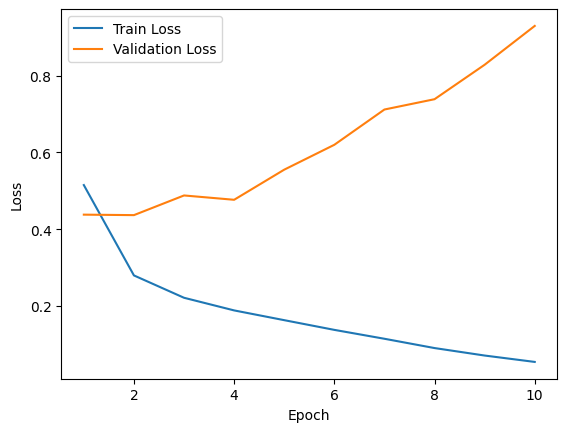

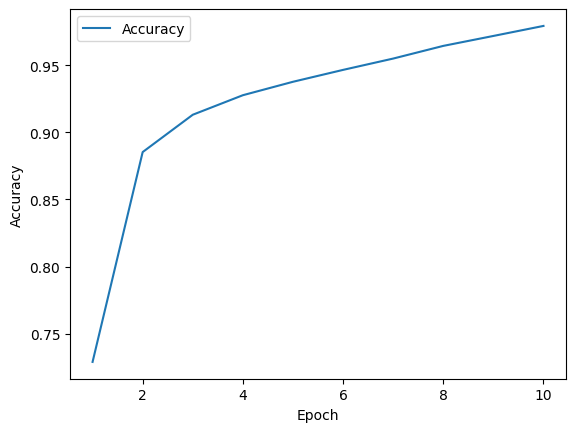

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from transformers import BertConfig, BertForSequenceClassification, BertTokenizer, BertForMaskedLM
from datasets import load_dataset
from transformers import BertTokenizer
from datasets import load_dataset, Dataset

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
dataset = load_dataset('glue', 'sst2')

train_dataset = dataset['train']
val_dataset = dataset['validation']
test_dataset = dataset['test']

train_dataset = train_dataset.map(lambda examples: {
    'input_ids': tokenizer(examples['sentence'], padding='max_length', truncation=True)['input_ids'],
    'labels': examples['label']
}, batched=True)

val_dataset = val_dataset.map(lambda examples: {
    'input_ids': tokenizer(examples['sentence'], padding='max_length', truncation=True)['input_ids'],
    'labels': examples['label']
}, batched=True)

# Define the configuration for the smaller model
config = BertConfig(
    hidden_size=510,  # Decrease the hidden size
    num_attention_heads=6,  # Reduce the number of attention heads
    num_hidden_layers=6,  # Reduce the number of hidden layers
    intermediate_size=1024,  # Adjust the intermediate size accordingly
    hidden_dropout_prob=0.2,
    attention_probs_dropout_prob=0.2
)

# Create the smaller BERT model
model = BertForMaskedLM(config)

# Create the model architecture for sequence classification
model = BertForSequenceClassification(config)

train_encodings = tokenizer(train_dataset["sentence"], truncation=True, padding=True)
train_labels = train_dataset["label"]

train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings["input_ids"]),
    torch.tensor(train_encodings["attention_mask"]),
    torch.tensor(train_labels)
)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

# Fine-tune the model
model.train()
train_losses = []
val_losses = []
accuracies = []

for epoch in range(10): 
    total_loss = 0
    total_correct = 0
    total_samples = 0
    
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

        _, predicted_labels = torch.max(outputs.logits, dim=1)
        total_correct += (predicted_labels == labels).sum().item()
        total_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)
    accuracy = total_correct / total_samples
    accuracies.append(accuracy)
    
    print(f"Epoch {epoch+1} - Avg Train Loss: {avg_train_loss:.4f}")
    print(f"Epoch {epoch+1} - Accuracy: {accuracy:.2%}")

    eval_encodings = tokenizer(val_dataset["sentence"], truncation=True, padding=True)
    eval_labels = val_dataset["label"]

    eval_dataset = torch.utils.data.TensorDataset(
        torch.tensor(eval_encodings["input_ids"]),
        torch.tensor(eval_encodings["attention_mask"]),
        torch.tensor(eval_labels)
    )
    eval_dataloader = DataLoader(eval_dataset, batch_size=16, shuffle=False)

    model.eval()
    total_eval_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for batch in eval_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_eval_loss += loss.item()

            _, predicted_labels = torch.max(outputs.logits, dim=1)
            total_correct += (predicted_labels == labels).sum().item()
            total_samples += labels.size(0)

    avg_eval_loss = total_eval_loss / len(eval_dataloader)
    val_losses.append(avg_eval_loss)
    accuracy = total_correct / total_samples
    
    print("Avg Eval Loss: {:.4f}".format(avg_eval_loss))
    print("Accuracy: {:.2%}".format(accuracy))
    print()

# Plotting the train and validation loss per epoch
plt.plot(range(1, len(train_losses)+1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the accuracy per epoch
plt.plot(range(1, len(accuracies)+1), accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Save the fine-tuned model
model.save_pretrained('fine_tuned_model_6_6_256')
tokenizer.save_pretrained('fine_tuned_model_6_6_256')

('fine_tuned_model_6_6_256/tokenizer_config.json',
 'fine_tuned_model_6_6_256/special_tokens_map.json',
 'fine_tuned_model_6_6_256/vocab.txt',
 'fine_tuned_model_6_6_256/added_tokens.json')

In [ ]:
total_params = sum(p.numel() for p in model.parameters())
print("Total Parameters: ", total_params)

Total Parameters:  28633976


In [ ]:
from transformers import BertConfig, BertForSequenceClassification

model_path = "/content/fine_tuned_model_6_6_256/pytorch_model.bin"

config = BertConfig.from_pretrained("/content/fine_tuned_model_6_6_256/config.json")
model = BertForSequenceClassification(config)
model.load_state_dict(torch.load(model_path))

total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Total Parameters: {total_params}")
print(f"Trainable Parameters: {trainable_params}")


Total Parameters: 28633976
Trainable Parameters: 28633976


Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Epoch 1 - Avg Train Loss: 0.6825
Epoch 1 - Train Accuracy: 55.94%
Avg Eval Loss: 0.6883
Eval Accuracy: 52.98%

Epoch 2 - Avg Train Loss: 0.6346
Epoch 2 - Train Accuracy: 64.36%
Avg Eval Loss: 0.6047
Eval Accuracy: 65.60%

Epoch 3 - Avg Train Loss: 0.5199
Epoch 3 - Train Accuracy: 74.42%
Avg Eval Loss: 0.5328
Eval Accuracy: 70.87%

Epoch 4 - Avg Train Loss: 0.4469
Epoch 4 - Train Accuracy: 79.39%
Avg Eval Loss: 0.5034
Eval Accuracy: 76.72%

Epoch 5 - Avg Train Loss: 0.3983
Epoch 5 - Train Accuracy: 82.48%
Avg Eval Loss: 0.4850
Eval Accuracy: 76.26%

Epoch 6 - Avg Train Loss: 0.3600
Epoch 6 - Train Accuracy: 84.35%
Avg Eval Loss: 0.4842
Eval Accuracy: 78.78%

Epoch 7 - Avg Train Loss: 0.3295
Epoch 7 - Train Accuracy: 85.94%
Avg Eval Loss: 0.4941
Eval Accuracy: 78.90%

Epoch 8 - Avg Train Loss: 0.3067
Epoch 8 - Train Accuracy: 87.29%
Avg Eval Loss: 0.4983
Eval Accuracy: 78.90%

Epoch 9 - Avg Train Loss: 0.2878
Epoch 9 - Train Accuracy: 88.25%
Avg Eval Loss: 0.5257
Eval Accuracy: 79.70%

E

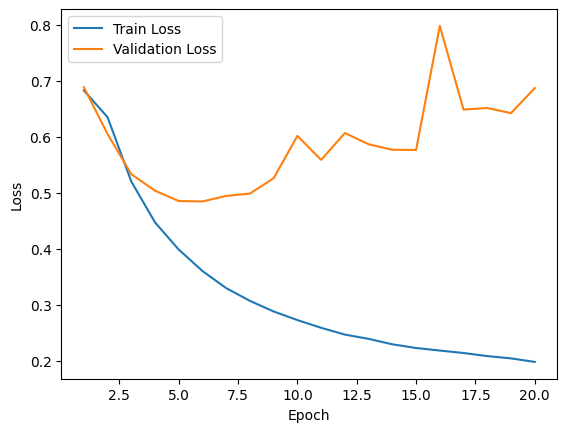

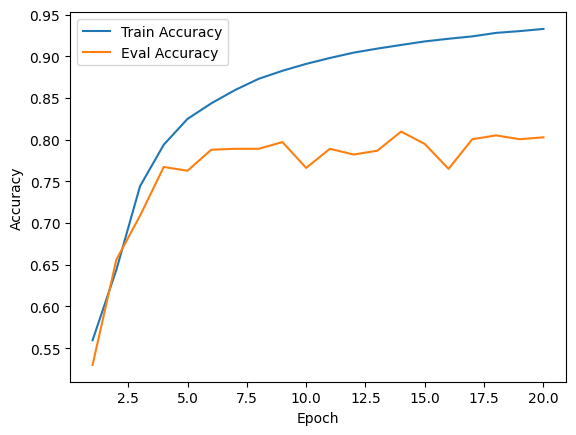

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from transformers import BertConfig, BertForSequenceClassification, BertTokenizer, BertForMaskedLM
from datasets import load_dataset
from transformers import BertTokenizer
from datasets import load_dataset, Dataset
from torch.nn.utils import clip_grad_norm_

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
dataset = load_dataset('glue', 'sst2')

train_dataset = dataset['train']
val_dataset = dataset['validation']
test_dataset = dataset['test']

train_dataset = train_dataset.map(lambda examples: {
    'input_ids': tokenizer(examples['sentence'], padding='max_length', truncation=True)['input_ids'],
    'labels': examples['label']
}, batched=True)

val_dataset = val_dataset.map(lambda examples: {
    'input_ids': tokenizer(examples['sentence'], padding='max_length', truncation=True)['input_ids'],
    'labels': examples['label']
}, batched=True)

# Define the configuration for the smaller model
config = BertConfig(
    hidden_size=510,  # Decrease the hidden size
    num_attention_heads=6,  # Reduce the number of attention heads
    num_hidden_layers=6,  # Reduce the number of hidden layers
    intermediate_size=1024,  # Adjust the intermediate size accordingly
    hidden_dropout_prob=0.2,
    attention_probs_dropout_prob=0.2
)

# Create the smaller BERT model
model = BertForMaskedLM(config)

# Create the model architecture for sequence classification
model = BertForSequenceClassification(config)

train_encodings = tokenizer(train_dataset["sentence"], truncation=True, padding=True)
train_labels = train_dataset["label"]

train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings["input_ids"]),
    torch.tensor(train_encodings["attention_mask"]),
    torch.tensor(train_labels)
)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-6, weight_decay=1e-5)

# Fine-tune the model
model.train()
train_losses = []
val_losses = []
train_accuracies = []
eval_accuracies = []

for epoch in range(20):
    total_loss = 0
    total_correct = 0
    total_samples = 0

    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()

        # Apply gradient clipping
        clip_grad_norm_(model.parameters(), max_norm=1.0)  # Set the max_norm value as desired

        optimizer.step()

        _, predicted_labels = torch.max(outputs.logits, dim=1)
        total_correct += (predicted_labels == labels).sum().item()
        total_samples += labels.size(0)

    avg_train_loss = total_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)
    train_accuracy = total_correct / total_samples
    train_accuracies.append(train_accuracy)

    print(f"Epoch {epoch+1} - Avg Train Loss: {avg_train_loss:.4f}")
    print(f"Epoch {epoch+1} - Train Accuracy: {train_accuracy:.2%}")

    eval_encodings = tokenizer(val_dataset["sentence"], truncation=True, padding=True)
    eval_labels = val_dataset["label"]

    eval_dataset = torch.utils.data.TensorDataset(
        torch.tensor(eval_encodings["input_ids"]),
        torch.tensor(eval_encodings["attention_mask"]),
        torch.tensor(eval_labels)
    )
    eval_dataloader = DataLoader(eval_dataset, batch_size=16, shuffle=False)

    model.eval()
    total_eval_loss = 0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for batch in eval_dataloader:
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_eval_loss += loss.item()

            _, predicted_labels = torch.max(outputs.logits, dim=1)
            total_correct += (predicted_labels == labels).sum().item()
            total_samples += labels.size(0)

    avg_eval_loss = total_eval_loss / len(eval_dataloader)
    val_losses.append(avg_eval_loss)
    eval_accuracy = total_correct / total_samples
    eval_accuracies.append(eval_accuracy)

    print("Avg Eval Loss: {:.4f}".format(avg_eval_loss))
    print("Eval Accuracy: {:.2%}".format(eval_accuracy))
    print()

# Plotting the train and validation loss per epoch
plt.plot(range(1, len(train_losses)+1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the train and validation accuracy per epoch
plt.plot(range(1, len(train_accuracies)+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(eval_accuracies)+1), eval_accuracies, label='Eval Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
